In [180]:
import pandas as pd 
df_irrigation = pd.read_csv("Irrigation/datasets - datasets.csv")

In [181]:
df_irrigation.head()

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0


In [182]:
df_fertilizer = pd.read_csv("Fertilizer/Fertilizer Prediction.csv")
df_fertility = pd.read_csv("Fertility/dataset1.csv")

In [183]:
df_fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [184]:
df_fertility.head(5)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


# Irrigation

In [185]:
df_irrigation.columns

Index(['CropType', 'CropDays', 'SoilMoisture', 'temperature', 'Humidity',
       'Irrigation'],
      dtype='object')

In [186]:
crops = df_irrigation[df_irrigation.columns[0]].unique()
crops

array(['Wheat', 'Groundnuts', 'Garden Flowers', 'Maize', 'Paddy',
       'Potato', 'Pulse', 'Sugarcane', 'Coffee'], dtype=object)

<Axes: xlabel='CropType'>

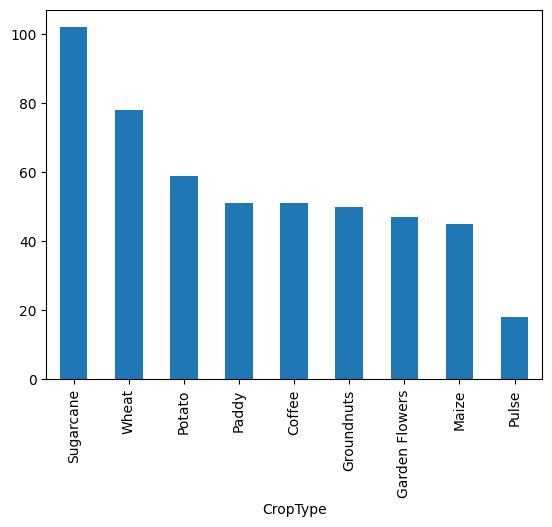

In [187]:
import matplotlib.pyplot as plt
df_irrigation[df_irrigation.columns[0]].value_counts().plot(kind = "bar")

In [188]:
df_irrigation[df_irrigation.columns[0]].value_counts()

CropType
Sugarcane         102
Wheat              78
Potato             59
Paddy              51
Coffee             51
Groundnuts         50
Garden Flowers     47
Maize              45
Pulse              18
Name: count, dtype: int64

In [189]:
df_irrigation.iloc[:,1:].skew()

CropDays         0.889895
SoilMoisture     0.584956
temperature     15.328583
Humidity         0.417781
Irrigation       0.438548
dtype: float64

In [190]:
import seaborn as sns
def plot_skewness(df):
    n_cols = df.shape[1]
    fig, axes = plt.subplots(n_cols, 2, figsize=(12, 4 * n_cols))
    
    if n_cols == 1:
        axes = [axes]

    for i, column in enumerate(df.columns):
        skewness = df[column].skew()
        sns.histplot(df[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column} (Skewness: {skewness:.2f})')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

<Axes: >

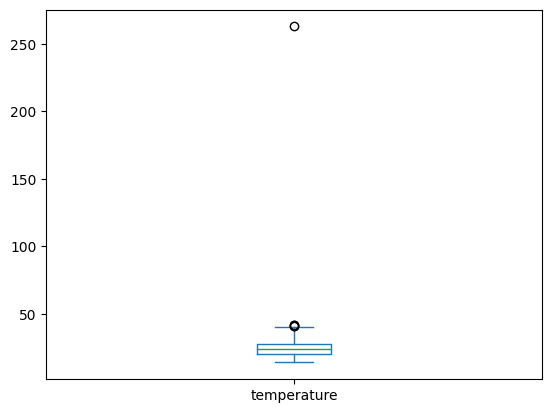

In [191]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=3)
df_irrigation[df_irrigation.columns[3]].plot(kind = "box")

In [192]:
df_irrigation = df_irrigation.drop(df_irrigation[df_irrigation[df_irrigation.columns[3]]>= 50].index)

In [193]:
df_irrigation.iloc[:,1:].skew()

CropDays        0.893818
SoilMoisture    0.581999
temperature     0.537771
Humidity        0.415490
Irrigation      0.435168
dtype: float64

<Axes: >

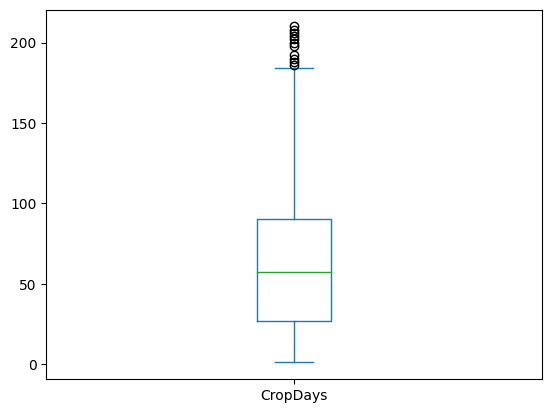

In [194]:
df_irrigation[df_irrigation.columns[1]].plot(kind = "box")

In [195]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_irrigation['CropDays'].quantile(0.25)
Q3 = df_irrigation['CropDays'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_irrigation[(df_irrigation['CropDays'] < lower_bound) | (df_irrigation['CropDays'] > upper_bound)].index
print(len(outliers))
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers:\n{outliers}")

11
Lower Bound: -67.5
Upper Bound: 184.5
Outliers:
Index([439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449], dtype='int64')


In [196]:
df_irrigation = df_irrigation.drop(outliers)

In [197]:
type(df_irrigation["CropDays"][0])

numpy.int64

In [198]:
df_irrigation.iloc[:,1:].skew()

CropDays        0.673276
SoilMoisture    0.581928
temperature     0.526933
Humidity        0.379311
Irrigation      0.423492
dtype: float64

<Axes: >

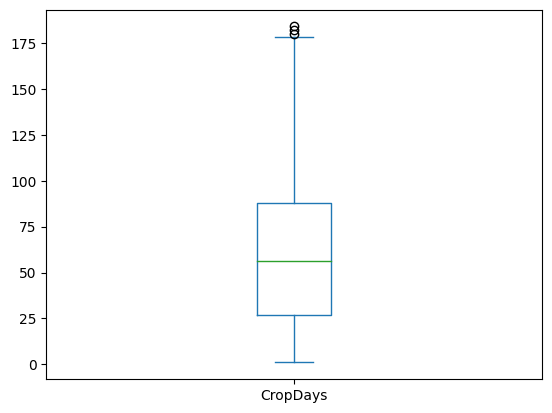

In [199]:
df_irrigation[df_irrigation.columns[1]].plot(kind = "box")

In [200]:
df_irrigation.describe()

,CropDays,SoilMoisture,temperature,Humidity,Irrigation
count,489.000000,489.000000,489.000000,489.000000,489.000000
mean,60.963190,412.237219,24.241309,39.797546,0.396728
std,41.726896,198.908798,5.772235,22.725507,0.489720
min,1.000000,120.000000,14.000000,11.000000,0.000000
25%,27.000000,230.000000,19.000000,19.000000,0.000000
50%,56.000000,370.000000,24.000000,33.000000,0.000000
75%,88.000000,554.000000,29.000000,65.000000,1.000000
max,184.000000,990.000000,42.000000,85.000000,1.000000


In [201]:
import numpy as np 
numeric_columns = ['SoilMoisture', 'temperature', 'Humidity']
df_irrigation[numeric_columns[1:]] = df_irrigation[numeric_columns[1:]].apply(lambda x: np.log1p(x))
df_irrigation[numeric_columns[:1]] = df_irrigation[numeric_columns[:1]].apply(lambda x: np.sqrt(x))
df_irrigation.iloc[:,1:].skew()

CropDays        0.673276
SoilMoisture    0.191339
temperature     0.076104
Humidity        0.016342
Irrigation      0.423492
dtype: float64

Irrigation
0    295
1    194
Name: count, dtype: int64


<Axes: xlabel='Irrigation'>

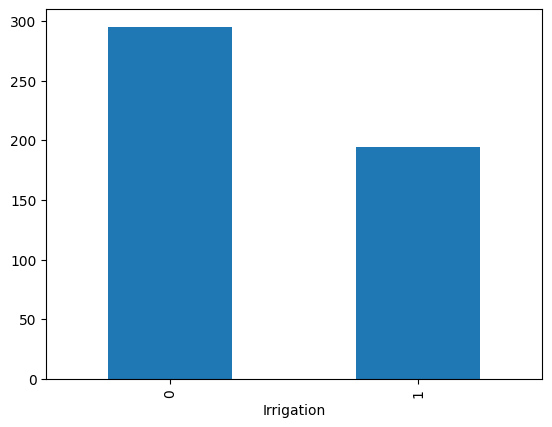

In [202]:
print(df_irrigation['Irrigation'].value_counts())
df_irrigation['Irrigation'].value_counts().plot(kind = 'bar')

In [203]:
crop_to_numerical = {crop : indx for indx , crop in enumerate(sorted(df_irrigation['CropType'].unique()))}
crop_to_numerical

{'Coffee': 0,
 'Garden Flowers': 1,
 'Groundnuts': 2,
 'Maize': 3,
 'Paddy': 4,
 'Potato': 5,
 'Pulse': 6,
 'Sugarcane': 7,
 'Wheat': 8}

In [204]:
df_irrigation['CropType'] = df_irrigation['CropType'].replace(crop_to_numerical)

In [205]:
df_irrigation

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,8,10,20.000000,3.433987,2.772589,0
1,8,7,14.142136,3.433987,3.496508,0
2,8,9,17.320508,3.091042,3.367296,0
3,8,3,22.360680,3.713572,3.135494,0
4,8,2,26.457513,3.178054,3.555348,0
...,...,...,...,...,...,...
496,0,93,25.980762,3.258097,2.995732,1
497,0,95,14.491377,3.178054,2.890372,0
498,0,97,19.949937,3.258097,2.944439,0
499,0,99,26.038433,3.218876,2.944439,1


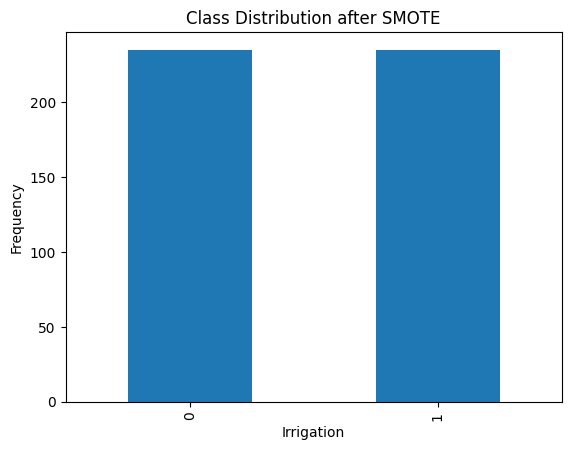

In [206]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = df_irrigation.drop(columns=['Irrigation'])
y = df_irrigation['Irrigation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts().plot(kind='bar')
plt.title('Class Distribution after SMOTE')
plt.xlabel('Irrigation')
plt.ylabel('Frequency')
plt.show()

In [207]:
print( y_test.value_counts())

Irrigation
0    60
1    38
Name: count, dtype: int64


Training Set Performance:
Accuracy: 1.0
Confusion Matrix:
 [[235   0]
 [  0 235]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       235

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470

Test Set Performance:
Accuracy: 0.9081632653061225
Confusion Matrix:
 [[53  7]
 [ 2 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        60
           1       0.84      0.95      0.89        38

    accuracy                           0.91        98
   macro avg       0.90      0.92      0.91        98
weighted avg       0.91      0.91      0.91        98



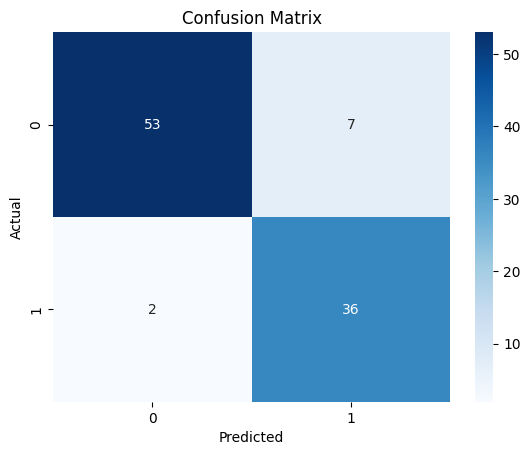

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred_train = model.predict(X_train_smote)
y_pred_test = model.predict(X_test)
print('Training Set Performance:')
print('Accuracy:', accuracy_score(y_train_smote, y_pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train_smote, y_pred_train))
print('Classification Report:\n', classification_report(y_train_smote, y_pred_train))

print('Test Set Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))
print('Classification Report:\n', classification_report(y_test, y_pred_test))


cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [209]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_smote,y_train_smote, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Cross-Validation Scores: [0.93617021 0.90425532 0.89361702 0.94680851 0.9787234 ]
Mean Cross-Validation Score: 0.9319148936170214


In [210]:
# import pickle
# with open('irrigation.pkl', 'wb') as file:
#     pickle.dump(model, file)

# Fertilizer

In [211]:
df_fertilizer

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [212]:
df_fertilizer.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [213]:
df_fertilizer.value_counts()

Temparature  Humidity   Moisture  Soil Type  Crop Type    Nitrogen  Potassium  Phosphorous  Fertilizer Name
25           50         26        Red        Ground Nuts  15        14         11           17-17-17           1
33           64         51        Sandy      Maize        5         9          29           14-35-14           1
                        39        Clayey     Paddy        13        0          10           20-20              1
                        34        Clayey     Pulses       38        0          0            Urea               1
                        31        Red        Ground Nuts  13        0          39           DAP                1
                                                                                                              ..
28           54         46        Clayey     Paddy        35        0          0            Urea               1
                        43        Clayey     Paddy        10        8          29           14-35-14 

# Fertility

In [214]:
df_fertility

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


In [215]:
df_fertility.columns

Index(['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B',
       'Output'],
      dtype='object')

In [216]:
df_fertility.isna().sum()

N         0
P         0
K         0
pH        0
EC        0
OC        0
S         0
Zn        0
Fe        0
Cu        0
Mn        0
B         0
Output    0
dtype: int64

In [217]:
df_fertility.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [218]:
df_fertility.skew()

N         -0.628791
P          3.399597
K          0.431791
pH        -5.109816
EC         0.102981
OC        24.324069
S          2.461067
Zn        20.885448
Fe         3.591439
Cu         0.431235
Mn         0.606551
B          2.132577
Output     0.349939
dtype: float64

In [219]:
df_fertility[df_fertility.columns[-1]].value_counts()

Output
1    440
0    401
2     39
Name: count, dtype: int64

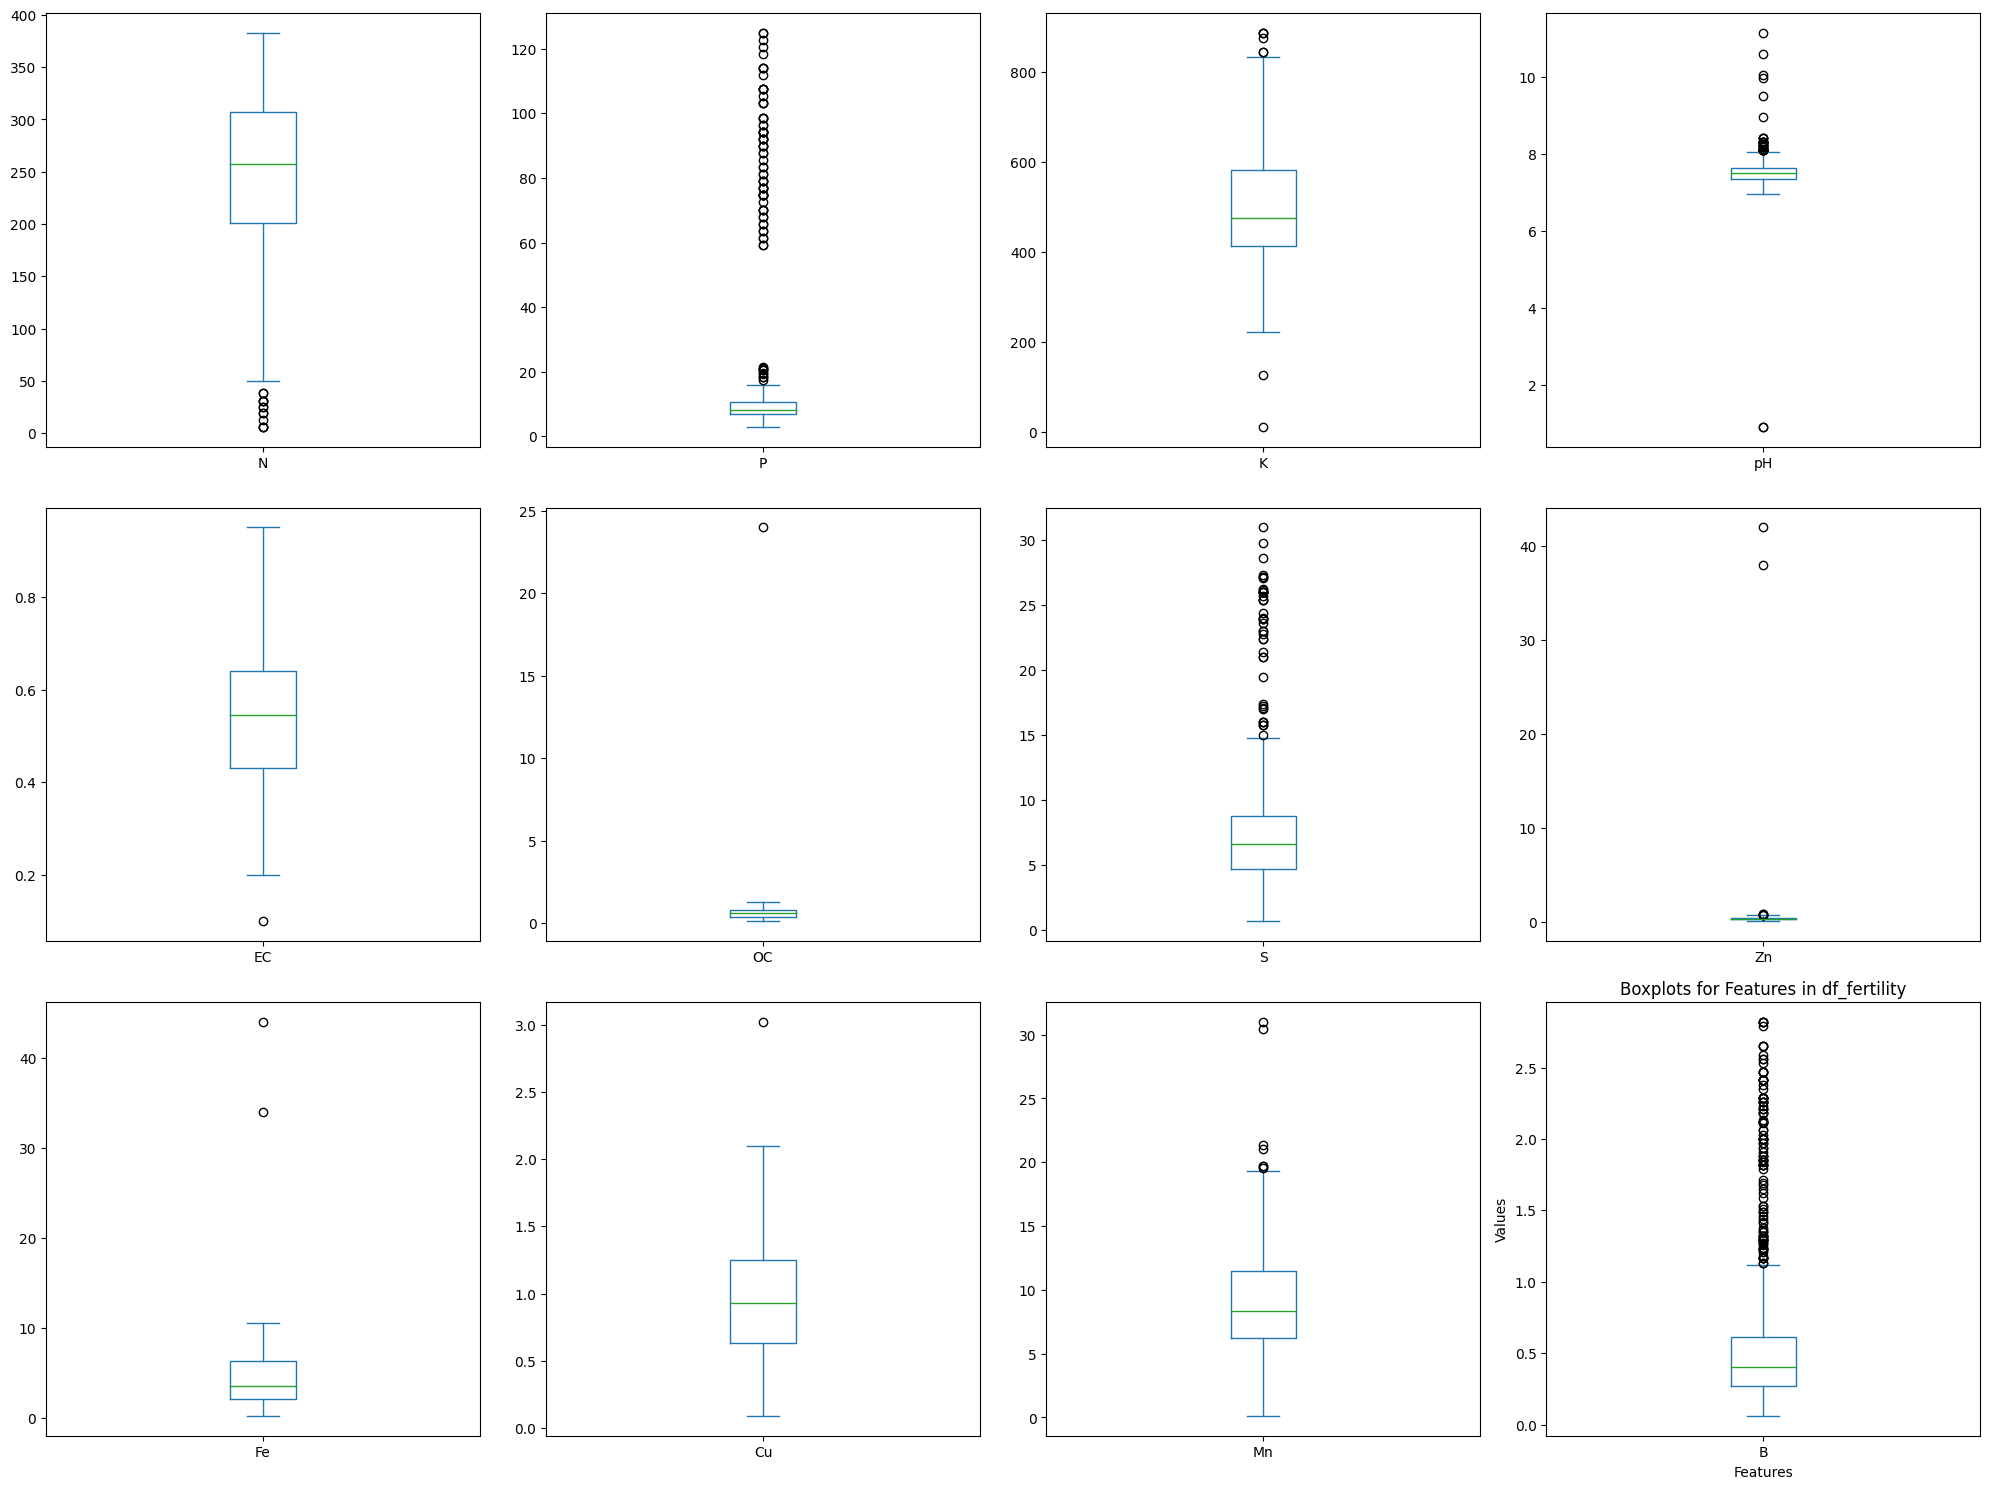

In [220]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  
for i, col in enumerate(df_fertility.columns[:-1]):
    ax = plt.subplot(3, 4, i+1)  
    df_fertility[col].plot(kind="box", ax=ax)  


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots for Features in df_fertility')

plt.tight_layout()
plt.show()

In [221]:
for col in df_fertility.columns[:-1]:
    
    Q1 = df_fertility[col].quantile(0.25)
    Q3 = df_fertility[col].quantile(0.75)
    IQR = Q3 - Q1
    

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
 
    outliers = df_fertility[(df_fertility[col] < lower_bound) | (df_fertility[col] > upper_bound)].index
    df_fertility = df_fertility.drop(index = outliers)
    print(df_fertility.skew())
    print(len(outliers))
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("---_--------------------_----------------------_---------------")

N         -0.459931
P          3.401006
K          0.435049
pH        -5.083451
EC         0.103035
OC        24.219992
S          2.513760
Zn        20.732389
Fe         3.613425
Cu         0.439203
Mn         0.603002
B          2.212213
Output     0.329688
dtype: float64
13
Lower Bound: 42.0
Upper Bound: 466.0
---_--------------------_----------------------_---------------
N         -0.474237
P          0.928673
K          0.423526
pH        -5.035928
EC         0.086637
OC        23.526185
S          2.435081
Zn        19.808044
Fe         3.911972
Cu         0.448134
Mn         0.644361
B          2.090609
Output     0.343474
dtype: float64
76
Lower Bound: 0.9500000000000002
Upper Bound: 16.549999999999997
---_--------------------_----------------------_---------------
N         -0.468801
P          0.947415
K          0.370939
pH        -5.040530
EC         0.071722
OC        23.399917
S          2.437854
Zn        19.658762
Fe         3.914459
Cu         0.441387
Mn         0.64

In [222]:
df_fertility.skew()

N        -0.477279
P         0.943567
K         0.408346
pH       -0.031306
EC        0.077964
OC        0.227972
S         0.570414
Zn        0.553984
Fe        0.392060
Cu        0.502117
Mn        0.358117
B         0.483453
Output    0.361974
dtype: float64

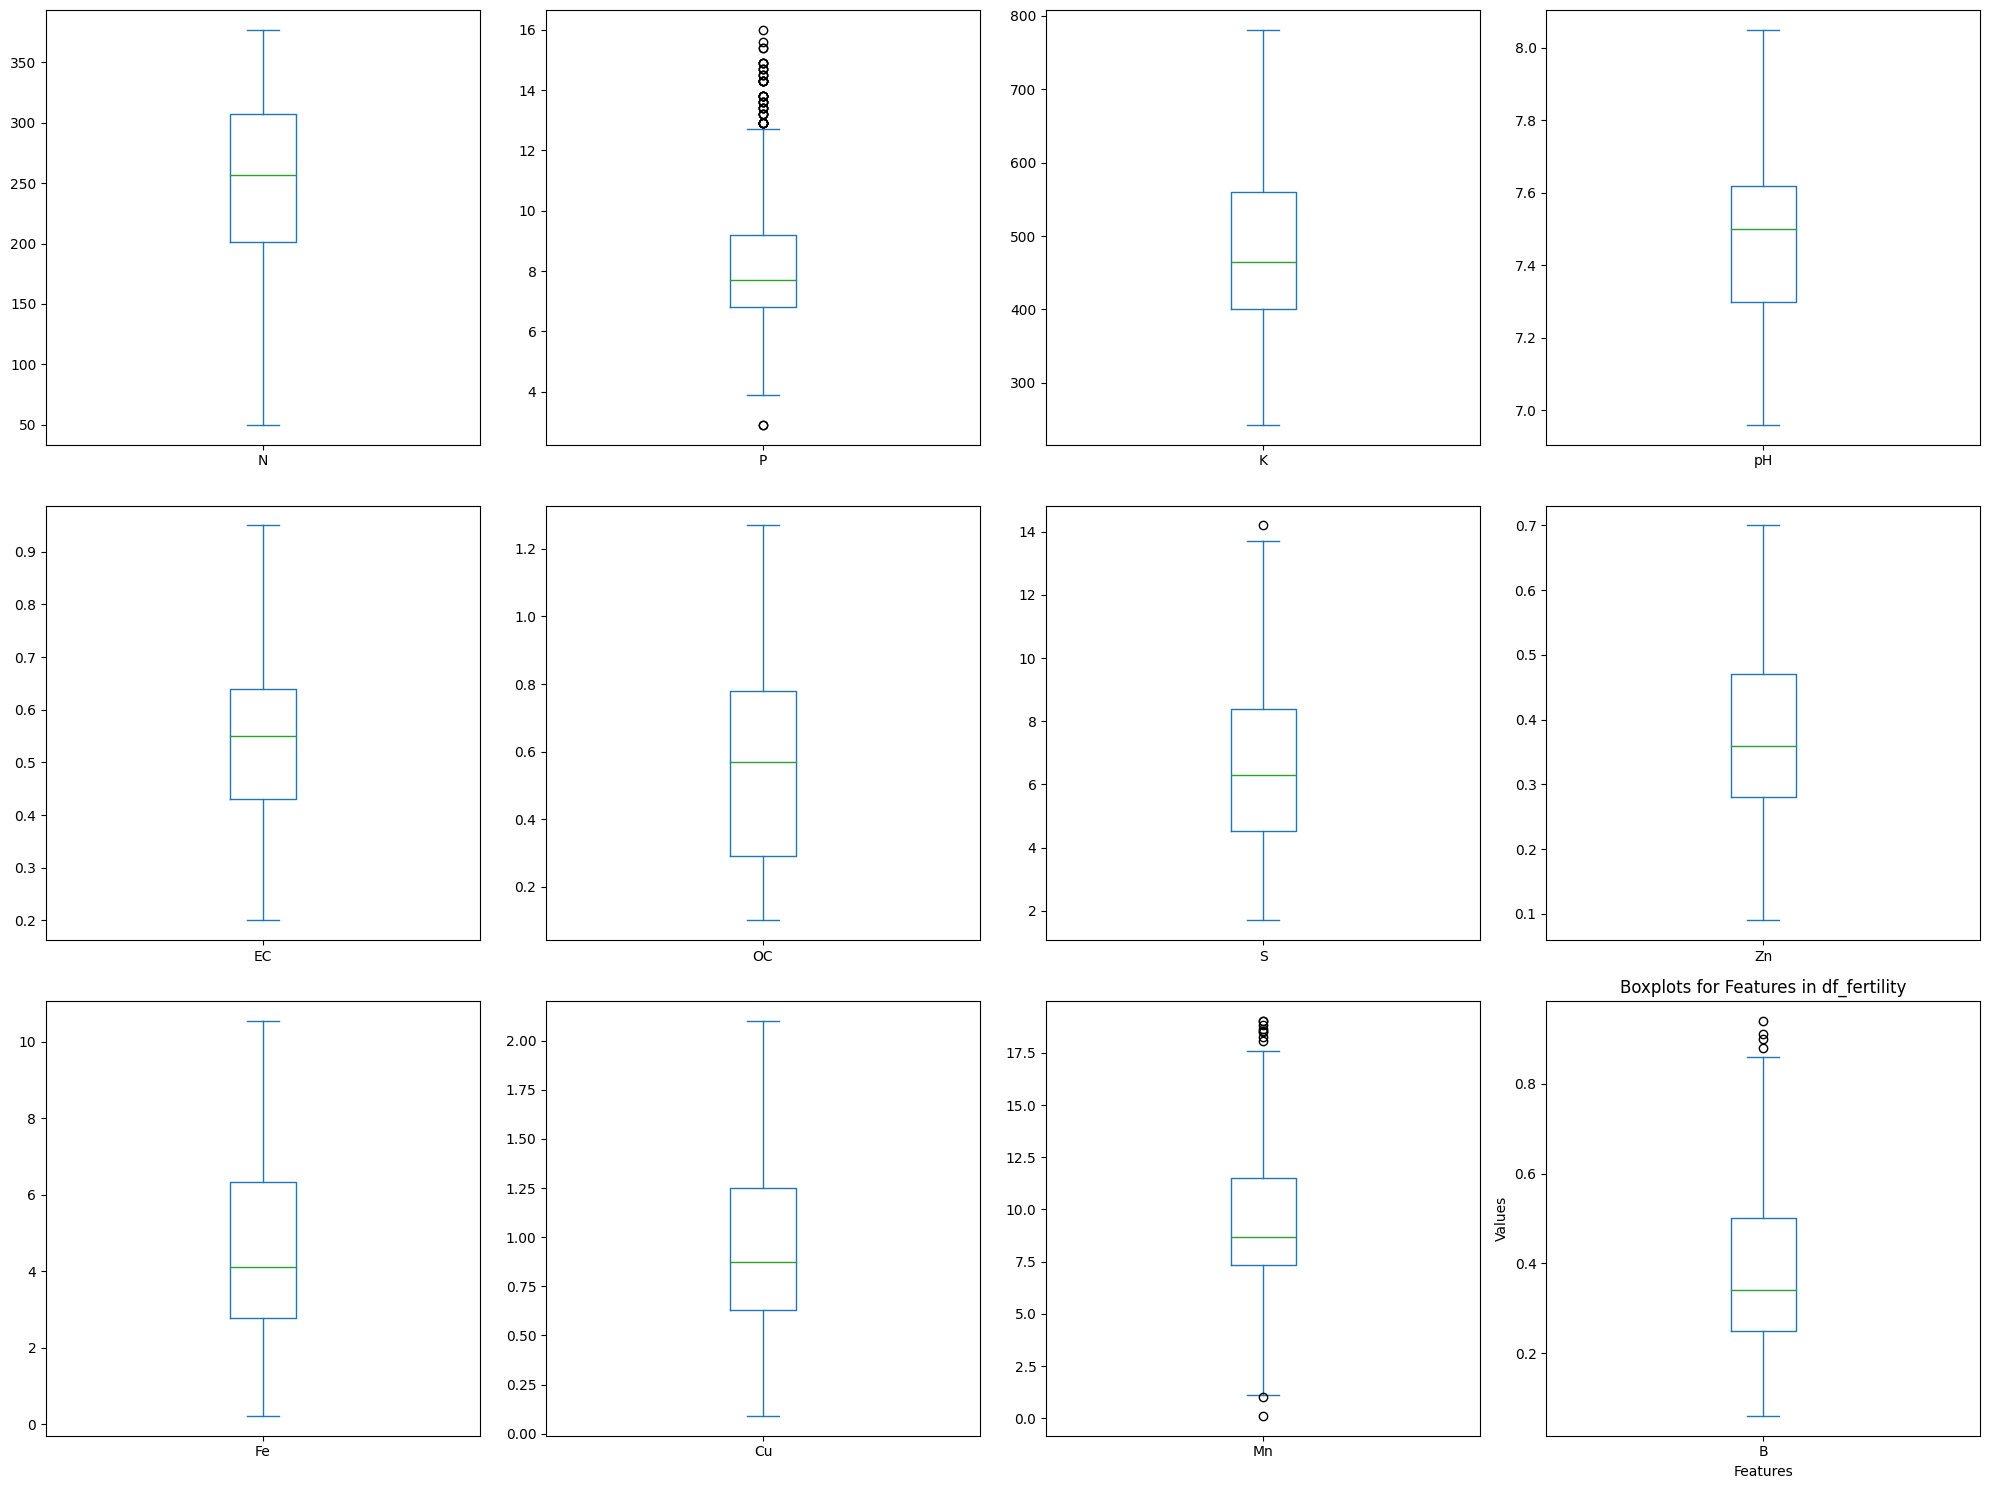

In [223]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  
for i, col in enumerate(df_fertility.columns[:-1]):
    ax = plt.subplot(3, 4, i+1)  
    df_fertility[col].plot(kind="box", ax=ax)  


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots for Features in df_fertility')

plt.tight_layout()
plt.show()

In [224]:
df_fertility

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
19,245,8.1,560,7.31,0.63,0.78,11.60,0.29,0.43,0.57,7.73,0.74,0
28,245,8.3,560,7.58,0.74,0.83,8.20,0.32,0.96,1.57,2.67,0.59,0
41,182,10.7,708,7.48,0.57,1.11,14.20,0.59,0.92,1.15,6.69,0.65,0
50,107,8.3,612,7.43,0.43,0.75,7.20,0.18,0.95,0.89,2.16,0.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


In [225]:
df_fertility[df_fertility.columns[-1]].value_counts()

Output
0    306
1    289
2     15
Name: count, dtype: int64

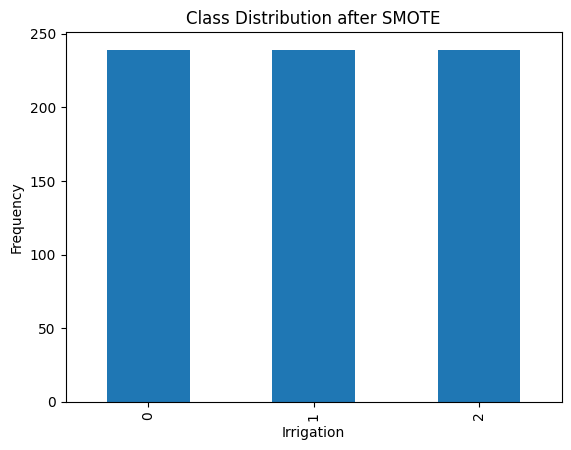

In [226]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = df_fertility.drop(columns=['Output'])
y = df_fertility['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts().plot(kind='bar')
plt.title('Class Distribution after SMOTE')
plt.xlabel('Irrigation')
plt.ylabel('Frequency')
plt.show()

In [227]:
y_train_smote.value_counts()

Output
0    239
1    239
2    239
Name: count, dtype: int64

In [228]:
rf_classifier = RandomForestClassifier(random_state=42)

 
rf_classifier.fit(X_train_smote, y_train_smote)

 
y_pred_train = rf_classifier.predict(X_train_smote)

 
y_pred_test = rf_classifier.predict(X_test)

 
print('Training Set Performance:')
print('Accuracy:', accuracy_score(y_train_smote, y_pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train_smote, y_pred_train))
print('Classification Report:\n', classification_report(y_train_smote, y_pred_train))

print('Test Set Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))
print('Classification Report:\n', classification_report(y_test, y_pred_test))

Training Set Performance:
Accuracy: 1.0
Confusion Matrix:
 [[239   0   0]
 [  0 239   0]
 [  0   0 239]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       239

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717

Test Set Performance:
Accuracy: 0.8770491803278688
Confusion Matrix:
 [[58  9  0]
 [ 3 48  2]
 [ 0  1  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91        67
           1       0.83      0.91      0.86        53
           2       0.33      0.50      0.40         2

    accuracy                           0.88       122
   macro avg       0.70      0.76      0.72       122
weighted avg       0.89      0.88

In [229]:
cv_scores = cross_val_score(rf_classifier, X_train_smote, y_train_smote, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', np.mean(cv_scores))

Cross-Validation Scores: [0.95138889 0.98611111 0.96503497 0.95104895 0.95104895]
Mean Cross-Validation Score: 0.9609265734265733


In [230]:
# model_filename = 'fertility.pkl'
# with open(model_filename, 'wb') as file:
#     pickle.dump(rf_classifier, file)